In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Primero descargamos el data set
df = pd.read_csv("Bank Transactions Analitica Empresarial.csv")
# display(df)

In [ ]:
#Observamos que el dataset se haya cargado bien
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Mostrar el tipo de valor que se tiene en cada columna y la cantidad de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
# Eliminamos las columnas innecesarias para el proyecto
datos = df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2","CLIENTNUM"],axis=1)

In [ ]:
# Mostrar 5 datos aleatorios del dataset
datos.sample(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8507,Attrited Customer,55,F,1,Unknown,Unknown,Less than $40K,Blue,36,2,3,2,3626.0,795,2831.0,0.896,2954,42,0.556,0.219
902,Existing Customer,41,M,2,Unknown,Single,$60K - $80K,Blue,24,6,2,2,17298.0,2310,14988.0,0.844,3663,65,0.806,0.134
6052,Existing Customer,43,F,2,Uneducated,Divorced,Less than $40K,Blue,31,5,3,1,4332.0,1313,3019.0,0.671,4093,84,0.826,0.303
325,Existing Customer,34,M,3,High School,Married,$60K - $80K,Blue,26,4,3,3,3265.0,2517,748.0,0.952,1843,35,0.944,0.771
97,Existing Customer,53,M,3,Doctorate,Married,$40K - $60K,Blue,35,5,3,2,3789.0,1706,2083.0,1.047,1609,42,0.680,0.450


In [ ]:
# Verificar valores nulos (NaN) en todas las columnas
datos.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

El dataset no tiene valores nulos para ninguna de las columnas, por lo que la limpieza de estos valores no es necesaria en este caso.

Para las variables categoricas, exploremos cuantas categorías hay para cada una.


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

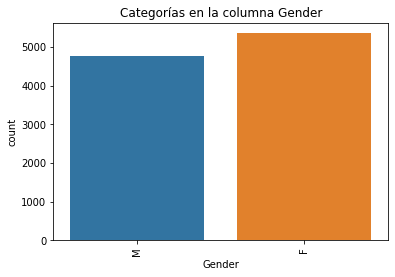

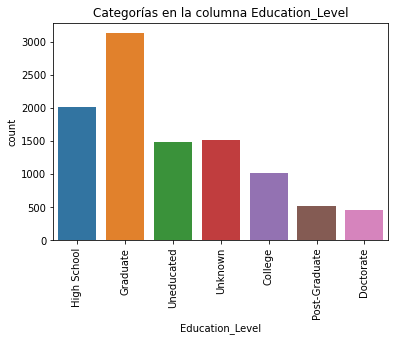

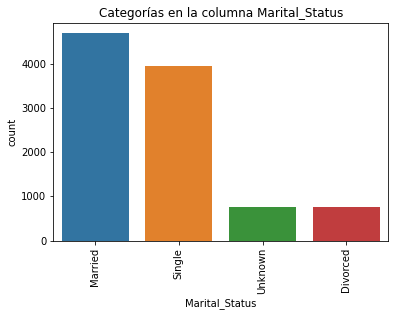

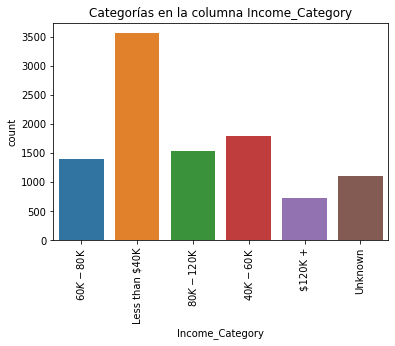

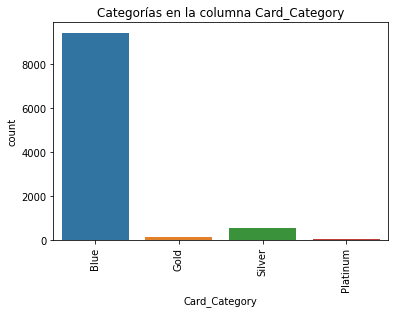

In [ ]:
columnas_categoricas = ['Gender', 'Education_Level',
                        'Marital_Status', 'Income_Category', 'Card_Category']
# Mostrar la cantidad de categorias para cada columna categorica
for col in columnas_categoricas:
  sns.countplot(x=col, data=datos) # Mostrar la cantidad de datos por categoría en la columna en la gráfica
  plt.title(f"Categorías en la columna {col}")
  plt.xticks(rotation=90) # Rotar los nombres en el eje x 90 grados
  plt.show()
  print("\n\n")

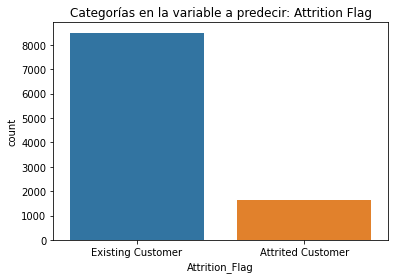

In [ ]:
sns.countplot(x='Attrition_Flag', data=datos)
plt.title("Categorías en la variable a predecir: Attrition Flag")
plt.show()

Generar los dummy variables para las columnas categoricas.

In [ ]:
for col in columnas_categoricas:
  temp_df = pd.get_dummies(datos[col])
  # Unimos las nuevas columnas a la variable donde tenemos el dataset
  datos = pd.concat([datos, temp_df], axis=1)
# Mostramos los primeros 5 datos con las nuevas columnas
datos.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,Blue,Gold,Platinum,Silver
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,0,0,1,0,0,0,1,0,0,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,0,0,0,0,1,0,1,0,0,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,0,0,1,0,0,1,0,0,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,0,0,0,0,1,0,1,0,0,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Se generan tres columnas "Unknown" las cuales serían para Marital_Status, Income_Category y Education_Level, para evitar conflictos se cambia el nombre estas columnas agregando el nombre de la columna original.

In [ ]:
datos.columns = ['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
                 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
                 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
                 'F', 'M', 'College',
                 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated',
                 'Education_Unknown', 'Divorced', 'Married', 'Single', # Cambio de nombre al Unknown de Education
                 'Marital_Status_Unknown', '$120K +', '$40K - $60K', '$60K - $80K', # Cambio de nombre al Unknown de Marital Status
                 '$80K - $120K', 'Less than $40K', 'Income_Category_Unknown', 'Blue', # Cambio de nombre al Unknown de Income Category
                 'Gold', 'Platinum', 'Silver']
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Como ahora ya tenemos las dummy variables creadas, podemos hacer drop de las columnas originales.

In [ ]:
datos_numericos = datos.drop(columns=columnas_categoricas)
datos_numericos.sample(5)

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Income_Category_Unknown,Blue,Gold,Platinum,Silver
1189,Existing Customer,52,1,48,4,3,3,2066.0,1601,465.0,...,0,0,0,1,0,0,1,0,0,0
5141,Existing Customer,46,2,36,3,3,4,2283.0,1020,1263.0,...,0,0,0,0,1,0,1,0,0,0
5350,Attrited Customer,55,2,36,4,3,2,10241.0,1545,8696.0,...,0,0,0,0,0,1,1,0,0,0
6384,Attrited Customer,48,4,43,3,2,4,1538.0,0,1538.0,...,0,1,0,0,0,0,1,0,0,0
2154,Existing Customer,26,1,36,3,4,3,2703.0,1256,1447.0,...,0,1,0,0,0,0,1,0,0,0


La diferencia entre los datos originales y los procesados, es que en una estaban las columnas categoricas que contenían texto (datos) y en la otra solo quedaron las columnas por cada categoría y tienen un 1 o 0 dependiendo de si esa fila de datos pertenece o no a esa categoría.

In [ ]:
datos.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'F',
       'M', 'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', 'Education_Unknown', 'Divorced', 'Married', 'Single',
       'Marital_Status_Unknown', '$120K +', '$40K - $60K', '$60K - $80K',
       '$80K - $120K', 'Less than $40K', 'Income_Category_Unknown', 'Blue',
       'Gold', 'Platinum', 'Silver'],
      dtype='object')

In [ ]:
datos_numericos.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'F',
       'M', 'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', 'Education_Unknown', 'Divorced', 'Married', 'Single',
       'Marital_Status_Unknown', '$120K +', '$40K - $60K', '$60K - $80K',
       '$80K - $120K', 'Less than $40K', 'Income_Category_Unknown', 'Blue',
       'Gold', 'Platinum', 'Silver'],
      dtype='object')

La columna categorica restante es 'Attrition_Flag' la cual sería la variable objetivo que queremos predecir, en este caso sería 1 si el cliente abandonó el banco o 0 si el cliente continúa en el mismo banco.

In [ ]:
datos_numericos['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
datos_numericos['Attrition_Flag'] = datos_numericos['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Entrenamiento del algoritmo

## Correlacion entre variables

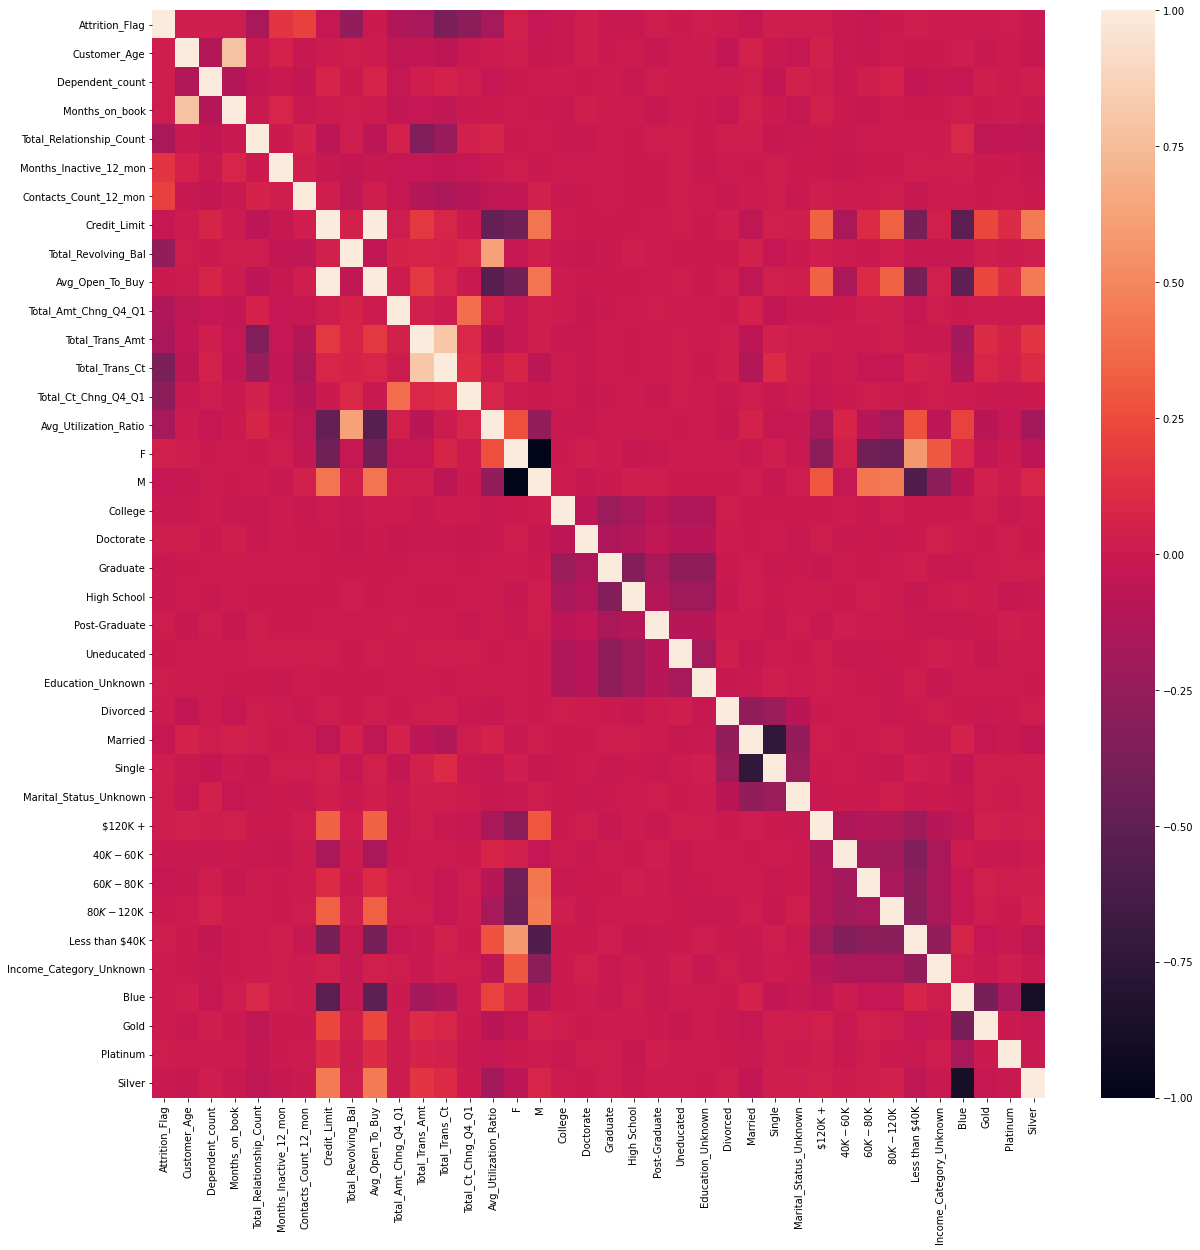

In [ ]:
# Revisamos la correlación de variables en los datos para entrenar
corr_matrix = datos_numericos.corr()
plt.figure(figsize=(20, 20)) # Hacer la gráfica más grande
sns.heatmap(data=corr_matrix)
plt.show()

In [ ]:
# Volvemos las correlaciones negativas a positivas
abs_corr = np.abs(corr_matrix["Attrition_Flag"])
abs_corr

Attrition_Flag              1.000000
Customer_Age                0.018203
Dependent_count             0.018991
Months_on_book              0.013687
Total_Relationship_Count    0.150005
Months_Inactive_12_mon      0.152449
Contacts_Count_12_mon       0.204491
Credit_Limit                0.023873
Total_Revolving_Bal         0.263053
Avg_Open_To_Buy             0.000285
Total_Amt_Chng_Q4_Q1        0.131063
Total_Trans_Amt             0.168598
Total_Trans_Ct              0.371403
Total_Ct_Chng_Q4_Q1         0.290054
Avg_Utilization_Ratio       0.178410
F                           0.037272
M                           0.037272
College                     0.007840
Doctorate                   0.029386
Graduate                    0.009046
High School                 0.011730
Post-Graduate               0.011127
Uneducated                  0.001444
Education_Unknown           0.009005
Divorced                    0.000850
Married                     0.023735
Single                      0.019037
M

In [ ]:
# Nos quedamos con las correlaciones que estén arriba de 0.01
correlacion_filtrada = abs_corr[abs_corr > 0.01]
correlacion_filtrada

Attrition_Flag              1.000000
Customer_Age                0.018203
Dependent_count             0.018991
Months_on_book              0.013687
Total_Relationship_Count    0.150005
Months_Inactive_12_mon      0.152449
Contacts_Count_12_mon       0.204491
Credit_Limit                0.023873
Total_Revolving_Bal         0.263053
Total_Amt_Chng_Q4_Q1        0.131063
Total_Trans_Amt             0.168598
Total_Trans_Ct              0.371403
Total_Ct_Chng_Q4_Q1         0.290054
Avg_Utilization_Ratio       0.178410
F                           0.037272
M                           0.037272
Doctorate                   0.029386
High School                 0.011730
Post-Graduate               0.011127
Married                     0.023735
Single                      0.019037
$40K - $60K                 0.011688
$60K - $80K                 0.028221
Less than $40K              0.022466
Platinum                    0.010823
Name: Attrition_Flag, dtype: float64

Una vez se estableció el mínimo de correlación entre las variables que dan información y la variable objetivo, nos quedamos con las variables que pasen el mínimo para realizar el entrenamiento del modelo. Pero antes entrenamos el modelo con todas las variables obtenidas luego del procesamiento para efectos de comparación.

##Entrenamiento con todos los datos

In [ ]:
# Separamos los datos en entrenamiento y la variable objetivo
X = datos_numericos.drop(columns=['Attrition_Flag'])
y = datos_numericos['Attrition_Flag']

In [ ]:
# Division del set de datos
from sklearn.model_selection import train_test_split

# Divimos los datos en entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Entrenamiento del modelo
from sklearn.linear_model import LogisticRegression
# Inicializamos el modelo
logistic = LogisticRegression()
# Entrenamos
logistic.fit(X_train, y_train) # Pasamos los datos para entrenar el modelo, y la variable objetivo a predecir

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Obtenemos las predicciones
y_pred = logistic.predict(X_test)

## Ver que tan bueno es el modelo

Precisión del modelo: 87.8907535373478 %



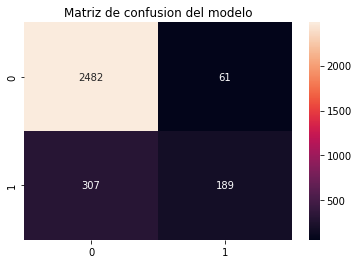

In [ ]:
# Importamos las metricas
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
# Medimos el accuracy score (Precisión)
acu_score = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {acu_score*100} %\n")
# Medimos la matriz de confusion
matrix_result = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_result, annot=True, fmt='g')
plt.title("Matriz de confusion del modelo")
plt.show()

Del lado izquierdo se puede ver los valores reales de la variable objetivo y abajo los valores resultantes de la predicción del modelo. En este caso tenemos:
* 2482 verdaderos negativos (True Negatives) que quiere decir que son clientes que se quedaron en el banco y el modelo hizo la predicción correcta.
* 307 falsos negativos (False Negatives), clientes que abandonaron el banco pero el modelo predijo que se quedaban en el banco.
* 61 falsos positivos (False Positives), clientes que se quedaron en el banco y el modelo predijo que lo abandonaron.
* 189 verdaderos positivos (True Positives), que son clientes que abandonaron y el modelo lo predijo de esa manera.


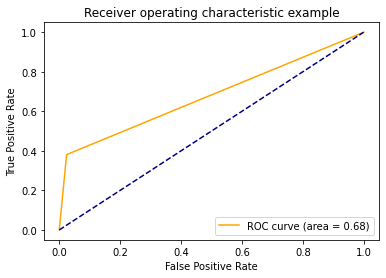

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
 
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], color='navy',  linestyle='--')
 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
 
plt.show()

El resultado de ROC es debido a que los datos se encuentran desbalanceados, es decir, tenemos más datos que corresponden a la clase de los clientes que se quedan en el banco (+8000 datos) y tenemos menos datos para la clase que abandona el banco (menos de 2000 datos) lo que puede causar cierta "confusion" en el modelo, porque tiende a sesgarse en las predicciones dando como resultado más predicciones donde el cliente se queda que en las que abandona.

## Entrenamiento con las variables que tienen una correlación mayor a 0.01

In [ ]:
# Separamos los datos en entrenamiento y la variable objetivo
datos_con_correlacion_minima = datos_numericos[correlacion_filtrada.index]
X_cor = datos_con_correlacion_minima.drop(columns=['Attrition_Flag'])
y_cor = datos_con_correlacion_minima['Attrition_Flag']
# Division del set de datos
from sklearn.model_selection import train_test_split

# Divimos los datos en entrenamiento y pruebas
X_train_cor, X_test_cor, y_train_cor, y_test_cor = train_test_split(X_cor, y_cor, test_size=0.3, random_state=42)
# Entrenamiento del modelo
from sklearn.linear_model import LogisticRegression
# Inicializamos el modelo
logistic_cor = LogisticRegression()
# Entrenamos
logistic_cor.fit(X_train_cor, y_train_cor) # Pasamos los datos para entrenar el modelo, y la variable objetivo a predecir
# Obtenemos las predicciones
y_pred_cor = logistic_cor.predict(X_test_cor)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Obtenemos las métricas del desempeño del modelo con los datos filtrados.

Precisión del modelo: 86.67324777887463 %



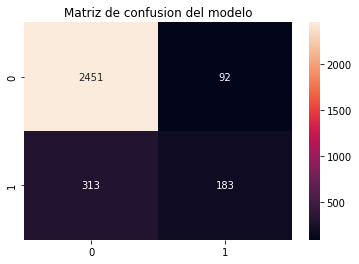

In [ ]:
# Importamos las metricas
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
# Medimos el accuracy score (Precisión)
acu_score_cor = accuracy_score(y_test_cor, y_pred_cor)
print(f"Precisión del modelo: {acu_score_cor*100} %\n")
# Medimos la matriz de confusion
matrix_result_cor = confusion_matrix(y_test_cor, y_pred_cor)
sns.heatmap(matrix_result_cor, annot=True, fmt='g')
plt.title("Matriz de confusion del modelo")
plt.show()

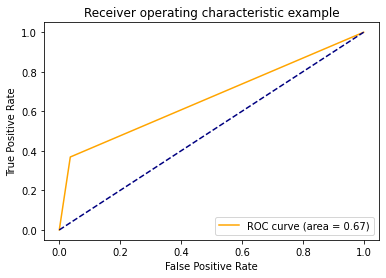

In [ ]:
fpr_cor, tpr_cor, threshold_cor = roc_curve(y_test_cor, y_pred_cor, pos_label=1)
roc_auc_cor = auc(fpr_cor, tpr_cor)
 
plt.figure()
plt.plot(fpr_cor, tpr_cor, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_cor)
plt.plot([0,1], color='navy',  linestyle='--')
 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
 
plt.show()

El modelo filtrando por las variables que tengan una correlación mínima de 0.01 bajo en su desempeño, dando como resultado un incremento en los falsos positivos y falsos negativos.

##Selección del modelo:

Nos quedamos con el primer modelo, al presentar una mayor precisión:

In [ ]:
# Guardar modelo
import pickle
pickle.dump(logistic, open('logistic_regression_model.pkl', 'wb'))

In [ ]:
# Cargar modelo guardado
modelo_guardado = pickle.load(open('logistic_regression_model.pkl', 'rb'))
print(modelo_guardado)

LogisticRegression()
